In [1]:
import sys
print(sys.version)#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find

## Machine Learning
import sklearn
import sklearn.metrics as metrics

3.5.2 (v3.5.2:4def2a2901a5, Jun 25 2016, 22:18:55) [MSC v.1900 64 bit (AMD64)]



Bad key "lines.markerfacecolor" on line 11 in
C:\Users\Administrator\AppData\Roaming\Python\Python35\site-packages\matplotlib\mpl-data\stylelib\classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "lines.markeredgecolor" on line 12 in
C:\Users\Administrator\AppData\Roaming\Python\Python35\site-packages\matplotlib\mpl-data\stylelib\classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#Read in from pandas
hotelDf = pandas.read_csv('reviews.csv')
hotelDf.columns=['idNum','filePath','hotelName','reviewColumn','ratingScore','groundTruth']
hotelDf = hotelDf.dropna().reset_index(drop=True)
hotelDf.head()

,idNum,filePath,hotelName,reviewColumn,ratingScore,groundTruth
0,169097965,data2/ca/1102799/4191651/169347960.html,Lakeview Hecla Resort,Stayed here for one night on the Stay and Play...,4,positive
1,169347960,data2/ca/1102799/4191651/170010173.html,Lakeview Hecla Resort,we called the day we checked in to have mainte...,2,negative
2,170010173,data2/ca/1102799/4191651/170153756.html,Lakeview Hecla Resort,This was our first visit to Lakeview Resort. B...,4,positive
3,194637934,data2/ca/1102799/4191651/194738124.html,Lakeview Hecla Resort,Great place if you like outdoor winter activit...,5,positive
4,194738124,data2/ca/1102799/4191651/194846811.html,Lakeview Hecla Resort,Hecla Resort is a reasonably priced winter get...,5,positive


# Q1. Sentiment Analysis and Aggregation

In [3]:
# Use vader to evaluated sentiment of reviews
def evalSentences(sentences, to_df=False, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pandas.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf
    
    else:
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()
            
reviews = hotelDf['reviewColumn'].values
reviewDF = evalSentences(reviews, to_df=True, columns=['reviewCol','vader'])
reviewDF

100%|█████████████████████████████████████████████████████████████████████████████| 2037/2037 [00:03<00:00, 528.03it/s]


,reviewCol,vader
0,Stayed here for one night on the Stay and Play...,0.9665
1,we called the day we checked in to have mainte...,-0.2296
2,This was our first visit to Lakeview Resort. B...,0.9779
3,Great place if you like outdoor winter activit...,0.9643
4,Hecla Resort is a reasonably priced winter get...,0.9705
5,Our initial impression was AWSOME! Check in wa...,0.9701
6,We were there to attend a wedding. Quality I f...,-0.6106
7,The staff at Lakeview Hecla Resort is very fri...,0.8955
8,We stayed at Lakeview Hecla for a wedding the ...,0.9956
9,The site of the resort is lovely! It was great...,0.8633


In [4]:
# Note: You may want to use an NLTK tokenizer instead of a regular expression in the following
def dataFrameTransformation(hotelDf, reviewDF, k=50):
    reviews = reviewDF['reviewCol'].values
    
    stop = set(stopwords.words('english'))
    
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in tokenize.regexp.regexp_tokenize(str(review), pattern=r'\w+')
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in tokenize.regexp.regexp_tokenize(str(reviews[i]), pattern=r'\w+')])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return topk, finaldf

In [5]:
topk, finaldf = dataFrameTransformation(hotelDf, reviewDF, k=50)

In [6]:
#Extract a list of hotels
#finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(reviewDF)
hotelNames = finaldf['hotelName'].unique()

def getHotelRank(df, measure='ratingScore'):
    #Rank the hotel by ground truth rating score
    hotelRating = []
    for hotel in hotelNames:
        itemDf = df.loc[df['hotelName']==hotel]
        hotelRating.append([hotel,itemDf[measure].mean()])
    hotelRatingDfGt = pandas.DataFrame(hotelRating)
    hotelRatingDfGt.columns=['hotelName','avgRatingScore']
    hotelRatingDfGt = hotelRatingDfGt.sort_values('avgRatingScore',ascending=0)
    return hotelRatingDfGt

In [7]:
hotelRatingDfGt = getHotelRank(finaldf)
hotelRatingDfGt.head()

,hotelName,avgRatingScore
89,Canalta Selkirk,5.000000
78,Inverness Falls Resort,5.000000
14,Lazy Bear Lodge,5.000000
55,Norwood Hotel,4.888889
66,Courtyard Winnipeg Airport,4.772727


In [8]:
hotelRatingDfGt.tail()

,hotelName,avgRatingScore
33,Viscount Gort Hotel Banquet and Conference Centre,2.333333
22,Econo Lodge,2.333333
54,Park West Inn,2.000000
53,Winnipeg Thriftlodge,1.727273
24,Airport Motor Inn,1.000000


In [9]:
def getHotelRank(df, measure='vader'):
    #Rank the hotel by ground truth rating score
    hotelRating = []
    for hotel in hotelNames:
        itemDf = df.loc[df['hotelName']==hotel]
        hotelRating.append([hotel,itemDf[measure].mean()])
    hotelRatingDfGt = pandas.DataFrame(hotelRating)
    hotelRatingDfGt.columns=['hotelName','avgvader']
    hotelRatingDfGt = hotelRatingDfGt.sort_values('avgvader',ascending=0)
    return hotelRatingDfGt


hotelRatingDfVd = getHotelRank(finaldf)
hotelRatingDfVd.head()

,hotelName,avgvader
19,Super 8 Winnipeg West,0.978050
78,Inverness Falls Resort,0.976900
89,Canalta Selkirk,0.971500
5,Victoria Inn Hotel & Convention Centre,0.971329
14,Lazy Bear Lodge,0.968867


In [10]:
hotelRatingDfVd.tail()

,hotelName,avgvader
87,Jolly Lodger Motel,0.208000
45,Express By Canad Inns - Fort Garry,0.111750
68,Hi-way Motel,0.039980
53,Winnipeg Thriftlodge,-0.003309
24,Airport Motor Inn,-0.638038


## There are a little bit diffrences like the rankings.

# Q2. Frequency Analysis

In [11]:
#We are only intereseted in this three column for overall analysis
itemAnalysisDf = finaldf[['reviewCol','groundTruth','vader']]
#itemAnalysisDf.loc[operator.gt(itemAnalysisDf['vader'],0)]['reviewCol']

def getTopK(df, k, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewCol'):
    stop = set(stopwords.words('english'))
    #Add possible Stop Words for Hotel Reviews
    stop.add('hotel')
    stop.add('room')
    stop.add('rooms')
    stop.add('stay')
    stop.add('staff')
    counter = Counter()
    for review in df.loc[operation(df[label_column],label_value)][value_column]:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)
    return topk

topkGroundPos = getTopK(df=itemAnalysisDf, k=50, label_value='positive')

topkGroundPos

[('great', 974),
 ('clean', 779),
 ('nice', 708),
 ('good', 699),
 ('breakfast', 666),
 ('would', 579),
 ('stayed', 541),
 ('winnipeg', 523),
 ('friendly', 518),
 ('comfortable', 492),
 ('one', 448),
 ('service', 442),
 ('pool', 441),
 ('well', 441),
 ('restaurant', 382),
 ('night', 346),
 ('area', 343),
 ('also', 341),
 ('airport', 340),
 ('time', 331),
 ('bed', 322),
 ('location', 315),
 ('place', 304),
 ('helpful', 300),
 ('desk', 294),
 ('food', 286),
 ('excellent', 276),
 ('beds', 275),
 ('front', 263),
 ('free', 263),
 ('get', 260),
 ('like', 255),
 ('always', 239),
 ('coffee', 238),
 ('parking', 231),
 ('really', 230),
 ('close', 229),
 ('back', 228),
 ('new', 216),
 ('recommend', 211),
 ('check', 208),
 ('could', 203),
 ('best', 200),
 ('hot', 199),
 ('definitely', 196),
 ('quiet', 196),
 ('inn', 190),
 ('two', 189),
 ('walk', 186),
 ('little', 183)]

In [12]:
topkGroundNeg = getTopK(df=itemAnalysisDf, k=50, label_value='negative')
topkGroundNeg

[('would', 270),
 ('desk', 230),
 ('night', 219),
 ('front', 202),
 ('good', 201),
 ('clean', 189),
 ('one', 187),
 ('nice', 180),
 ('pool', 173),
 ('stayed', 172),
 ('breakfast', 164),
 ('get', 148),
 ('could', 142),
 ('time', 138),
 ('bed', 137),
 ('place', 122),
 ('area', 121),
 ('told', 117),
 ('like', 116),
 ('service', 116),
 ('well', 115),
 ('great', 111),
 ('also', 110),
 ('bathroom', 103),
 ('hot', 101),
 ('even', 94),
 ('restaurant', 92),
 ('small', 92),
 ('food', 91),
 ('check', 91),
 ('really', 90),
 ('day', 90),
 ('back', 89),
 ('next', 87),
 ('morning', 84),
 ('friendly', 84),
 ('people', 84),
 ('never', 83),
 ('kids', 83),
 ('beds', 83),
 ('winnipeg', 82),
 ('floor', 82),
 ('got', 82),
 ('went', 81),
 ('parking', 80),
 ('old', 80),
 ('first', 80),
 ('comfortable', 77),
 ('door', 76),
 ('around', 76)]

## For positive reviews,"winnipeg" is a locale_specific words. Most words are postive.

## For negative reviews,'winnipeg' also occurs. What is interesting is there are a bunch of positive words.

In [13]:
tagger = PerceptronTagger()
pos_tag = tagger.tag

grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""

chunker = nltk.RegexpParser(grammar)

In [14]:
# Noun Phrase Extraction Support Functions
from nltk.corpus import stopwords
stopwords_1 = stopwords.words('english')
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case... 
def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopwords_1)
    return accepted

# generator, create item once a time
def get_terms(tree):
    for leaf in leaves(tree):
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term
            
# Flatten phrase lists to get tokens for analysis
def flatten(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

# Revise the previous dataframe transform function...
def newDataFrameTransformation(hotelDf, reviewDF, k=50):
    reviews = reviewDF['reviewCol'].values
    chunker = nltk.RegexpParser(grammar)
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update(flatten([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return topk, finaldf

topk_phrase, finaldf_phrase = newDataFrameTransformation(hotelDf, reviewDF)


In [15]:
#We are only intereseted in this three column for overall analysis
itemAnalysisDf = finaldf_phrase[['reviewCol','groundTruth','vader']]
#itemAnalysisDf.loc[operator.gt(itemAnalysisDf['vader'],0)]['reviewCol']

def getTopK_phrases(df, k, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewCol'):
    stop = set(stopwords.words('english'))
    #Add possible Stop Words for Hotel Reviews
    stop.add('hotel')
    stop.add('room')
    stop.add('rooms')
    stop.add('stay')
    stop.add('staff')
    counter = Counter()
    for review in df.loc[operation(df[label_column],label_value)][value_column]:
            counter.update(flatten([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', str(review))))) 
                            ]))
    topk = counter.most_common(k)
    return topk

topkGroundPos = getTopK_phrases(df=itemAnalysisDf, k=50, label_value='positive')

topkGroundPos

[('front desk', 98),
 ('hot tub', 62),
 ('fort garri', 46),
 ('great place', 45),
 ('pool area', 44),
 ('great locat', 37),
 ('continent breakfast', 36),
 ('front desk staff', 35),
 ('room servic', 34),
 ('first time', 31),
 ('comfort bed', 30),
 ('nice hotel', 27),
 ('fort garri hotel', 26),
 ('hotel staff', 26),
 ('great experi', 26),
 ('minut walk', 25),
 ('friendli staff', 23),
 ('next time', 22),
 ('next morn', 21),
 ('great hotel', 20),
 ('busi trip', 20),
 ('great stay', 19),
 ('winnipeg airport', 19),
 ('coffe maker', 18),
 ('short walk', 18),
 ('great servic', 17),
 ('free breakfast', 17),
 ('great view', 16),
 ('hotel room', 16),
 ('victoria inn', 16),
 ('good locat', 16),
 ('clean staff', 15),
 ('park lot', 15),
 ('new hotel', 15),
 ('custom servic', 15),
 ('nice touch', 14),
 ('airport hotel', 14),
 ('queen bed', 14),
 ('downtown winnipeg', 14),
 ('nice place', 14),
 ('good food', 14),
 ('sunday brunch', 14),
 ('holiday inn', 14),
 ('easi access', 14),
 ('free wifi', 13),
 

In [16]:
topkGroundNeg = getTopK_phrases(df=itemAnalysisDf, k=50, label_value='negative')
topkGroundNeg 

[('front desk', 94),
 ('hot tub', 33),
 ('front desk staff', 23),
 ('pool area', 20),
 ('next day', 17),
 ('continent breakfast', 14),
 ('park lot', 13),
 ('next morn', 13),
 ('canad inn', 11),
 ('first night', 11),
 ('hot water', 10),
 ('hotel room', 9),
 ('fort garri', 9),
 ('hotel staff', 9),
 ('next time', 9),
 ('room rate', 8),
 ('front desk clerk', 8),
 ('desk clerk', 8),
 ('first time', 8),
 ('room servic', 8),
 ('clean staff', 7),
 ('credit card', 7),
 ('coffe maker', 7),
 ('nice touch', 7),
 ('breakfast buffet', 7),
 ('last night', 7),
 ('new year', 6),
 ('second time', 6),
 ('mt centr', 6),
 ('good thing', 6),
 ('busi travel', 6),
 ('clean room', 6),
 ('lobbi area', 5),
 ('long time', 5),
 ('nice hotel', 5),
 ('free park', 5),
 ('room key', 5),
 ('long day', 5),
 ('queen bed', 5),
 ('water slide', 5),
 ('ground floor', 5),
 ('bad experi', 5),
 ('first floor', 5),
 ('drunk peopl', 5),
 ('hot breakfast', 5),
 ('marlborough hotel', 5),
 ('friday night', 4),
 ('young child', 4),


## For positive reviews,"fort garry" ,"winnipeg airport" ,"'victoria inn",are  locale_specific words. Most words are postive.
## For negative reviews,'fort garry' also occurs. What is interesting is there are a bunch of positive words. After reading the view , I find it is a satire or "but" is used after the positive words.

# Q3 Mutual Information

In [17]:
# get Top K mutual information terms from the dataframe
def getMI(topk, df, label_column='groundTruth'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(df[label_column],df[word[0]])])
    miScoredf = pandas.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf
miScoredf = getMI(topk, finaldf)

In [18]:
topk, finaldf = dataFrameTransformation(hotelDf, reviewDF, k=500)

In [55]:
miScoredf = getMI(topk, finaldf)
miScoredf[0:50]

,Word,MI Score
283,dirty,0.027309
108,told,0.027043
4,great,0.021679
20,desk,0.018465
171,asked,0.017943
23,front,0.013422
160,nothing,0.012882
443,carpet,0.012624
152,said,0.011869
264,put,0.009983


## Some words have strong sentiment like 'dirty', 'great', 'wonderful'. Many words are nouns about hotel things like bathroom, phone and chekcing.It is because the reviews about certain issues like service.

In [56]:
topk_phrase, finaldf_phrase = newDataFrameTransformation(hotelDf, reviewDF, k=500)
miScoredf_phrase = getMI(topk_phrase, finaldf_phrase)
miScoredf_phrase[0:50]


,Word,MI Score
0,front desk,0.010306
331,drunk peopl,0.003684
16,next day,0.003466
89,desk clerk,0.003109
68,canad inn,0.003069
378,decent stay,0.002946
374,cold shower,0.002946
351,next night,0.002946
61,hot water,0.002646
27,great hotel,0.002502


## Some words have strong sentiment like 'dirty', 'great', 'wonderful'. Locale-specific words includes "winnipeg airport","polo park".'Front desk' basically means negative feedback.

# Q4: Pointwise Mutual Information

In [21]:
# Simple example of getting pairwise mutual information of a term
def pmiCal(df, x):
    pmilist=[]
    for i in ['positive','negative']:
        for j in [0,1]:
            px = sum(df['groundTruth']==i)/(len(df)+0.0001)
            py = sum(df[x]==j)/(len(df)+0.0001)
            pxy = len(df[(df['groundTruth']==i) & (df[x]==j)])/(len(df)+0.0001)
            if pxy==0:#Log 0 cannot happen
                pmi = math.log10((pxy+0.0001)/((px*py)+0.0001))
            else:
                pmi = math.log10(pxy/((px*py)+0.0001))
            pmilist.append([i]+[j]+[px]+[py]+[pxy]+[pmi])
    pmidf = pandas.DataFrame(pmilist)
    pmidf.columns = ['x','y','px','py','pxy','pmi']
    return pmidf

def pmiIndivCal(df,x,gt, label_column='groundTruth'):
    px = sum(df[label_column]==gt)/(len(df)+0.0001)
    py = sum(df[x]==1)/(len(df)+0.0001)
    pxy = len(df[(df[label_column]==gt) & (df[x]==1)])/(len(df)+0.0001)
    if pxy==0:#Log 0 cannot happen
        pmi = math.log10((pxy+0.0001)/((px*py+0.0001)+0.0001))
    else:
        pmi = math.log10(pxy/((px*py+0.0001)+0.0001))
    return pmi

# Compute PMI for all terms and all possible labels
def pmiForAllCal(df, label_column='groundTruth', topk=topk):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    pmilist = []
    pmiposlist = []
    pmineglist = []
    for word in tqdm(topk):
        pmilist.append([word[0]]+[pmiCal(df,word[0])])
        pmiposlist.append([word[0]]+[pmiIndivCal(df,word[0],'positive',label_column)])
        pmineglist.append([word[0]]+[pmiIndivCal(df,word[0],'negative',label_column)])
    pmidf = pandas.DataFrame(pmilist)
    pmiposlist = pandas.DataFrame(pmiposlist)
    pmineglist = pandas.DataFrame(pmineglist)
    pmiposlist.columns = ['word','pmi']
    pmineglist.columns = ['word','pmi']
    pmidf.columns = ['word','pmi']
    return pmiposlist, pmineglist, pmidf

pmiposlist, pmineglist, pmidf = pmiForAllCal(finaldf)

#Sorted top pmi words for positive reviews
pmiposlist.sort_values('pmi',ascending=0).head(50)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:14<00:00, 34.76it/s]


,word,pmi
438,courteous,0.095896
235,fantastic,0.095488
456,travelling,0.092972
330,museum,0.087795
239,highly,0.085870
177,loved,0.084731
260,accommodating,0.083941
202,perfect,0.082395
360,professional,0.081034
105,wonderful,0.079800


In [22]:

#Sorted top pmi words for negative reviews
pmineglist.sort_values('pmi',ascending=0).head(50)

,word,pmi
283,dirty,0.572151
443,carpet,0.499717
108,told,0.465298
384,paid,0.447539
171,asked,0.434914
415,smell,0.430137
387,phone,0.429919
414,tried,0.420336
418,checking,0.420336
380,reservation,0.420336


## For positive reviews,"river" is locale_specific words. Most words are postive.
## For negative reviews,I see negative adjectives like old, bad and some nouns about hotel things.

In [23]:
pmiposlist_phrase, pmineglist_phrase, pmidf_phrase = pmiForAllCal(finaldf_phrase, topk = topk_phrase)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:14<00:00, 35.66it/s]


In [24]:
pmiposlist_phrase.sort_values('pmi',ascending=0).head(50)

,word,pmi
27,great hotel,0.098808
32,winnipeg airport,0.097576
43,great servic,0.096852
85,comfort room,0.091466
84,polo park,0.091466
83,human right museum,0.091466
130,pleasant surpris,0.085441
134,tim horton,0.085441
115,good restaur,0.085441
152,good breakfast,0.082460


In [25]:
pmineglist_phrase.sort_values('pmi',ascending=0).head(50)

,word,pmi
331,drunk peopl,0.515218
351,next night,0.487171
374,cold shower,0.487171
378,decent stay,0.487171
68,canad inn,0.460901
204,lobbi area,0.455795
89,desk clerk,0.445232
375,theme suit,0.444110
211,marlborough hotel,0.418308
61,hot water,0.412611


## For positive reviews,"winnipeg airport	" is locale_specific words. Most words are postive.
## For negative reviews,I see negative adjectives like old, bad and some nouns about hotel things.

In [26]:

hotelDf_top = hotelDf[hotelDf['hotelName']=='Inverness Falls Resort']
hotelDf_bottom = hotelDf[hotelDf['hotelName']=='Viscount Gort Hotel Banquet and Conference Centre']

reviewDF_top = reviewDF.iloc[hotelDf_top.index]
reviewDF_bottom = reviewDF.iloc[hotelDf_bottom.index]


hotelDf_top.reset_index(inplace=True)
hotelDf_bottom.reset_index(inplace=True)
reviewDF_top.reset_index(inplace=True)
reviewDF_bottom.reset_index(inplace=True)

topk_top_phrase, finaldf_top_phrase = newDataFrameTransformation(hotelDf_top, reviewDF_top)
topk_bottom_phrase, finaldf_bottom_phrase = newDataFrameTransformation(hotelDf_bottom, reviewDF_bottom)

In [27]:

pmiposlist_top_phrase, pmineglist_top_phrase, pmidf_top_phrase = pmiForAllCal(finaldf_top_phrase, topk=topk_top_phrase)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 78.81it/s]


In [28]:
pmiposlist_bottom_phrase, pmineglist_bottom_phrase, pmidf_bottom_phrase = pmiForAllCal(finaldf_bottom_phrase, topk=topk_bottom_phrase)

100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [00:00<00:00, 65.55it/s]


In [29]:
pmiposlist_top_phrase.sort_values('pmi',ascending=0).head(50)

,word,pmi
0,inver fall,-0.000253
3,great experi,-0.000253
4,first time,-0.000253
38,luxuri chalet,-0.000514
28,rain shower,-0.000514
29,terrif view,-0.000514
30,modern atmospher,-0.000514
31,comfi lake view,-0.000514
32,good ole cabin,-0.000514
33,person touch,-0.000514


In [30]:
pmiposlist_bottom_phrase.sort_values('pmi',ascending=0).head(50)

,word,pmi
20,free breakfast,0.476355
12,wonder valentin dinner,0.476355
26,comfort king size,0.476355
19,husband son,0.476355
27,differ room,-3.046510
21,park area,-3.046510
22,key card,-3.046510
23,eye roll,-3.046510
24,first time,-3.046510
25,hotel manag,-3.046510


In [31]:
pmineglist_top_phrase.sort_values('pmi',ascending=0).head(50)

,word,pmi
0,inver fall,-0.30103
37,boat rental,-0.30103
27,next visit,-0.30103
28,rain shower,-0.30103
29,terrif view,-0.30103
30,modern atmospher,-0.30103
31,comfi lake view,-0.30103
32,good ole cabin,-0.30103
33,person touch,-0.30103
34,day trip,-0.30103


In [32]:
pmineglist_bottom_phrase.sort_values('pmi',ascending=0).head(50)

,word,pmi
0,front desk staff,0.175715
28,sever buse,0.175715
21,park area,0.175715
22,key card,0.175715
23,eye roll,0.175715
24,first time,0.175715
25,hotel manag,0.175715
27,differ room,0.175715
29,wow famili,0.175715
17,overal qualiti,0.175715


We can find when analyzing particular hotels, top k words are more hotel-specific many nouns are about the particular hotel. For example,lakefront cabin occures because the Inverness Falls Resort has a river nearby. Basically we can get much information about a particular hotel from the analysis. 

# Q5. Gneral Plots

In [33]:
def getHistogram(measure, title):
    if measure=='both':
        x = [finaldf['ratingScore'].values/5]
        y = [finaldf['vader'].values]
        bins = np.linspace(-1, 1, 100)
        plt.title(title)
        plt.hist(x, bins, label='x')
        plt.hist(y, bins, label='y')
        plt.legend(loc='upper right')
        plt.show()
    
    else:
        plt.hist(finaldf[measure].values)
        plt.title(title)
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        fig = plt.gcf()

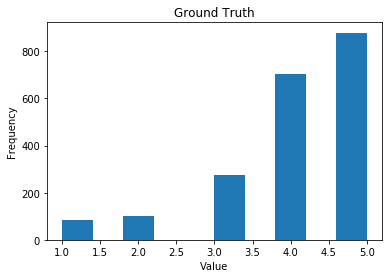

In [34]:
getHistogram('ratingScore', 'Ground Truth')

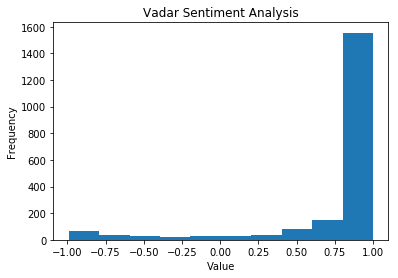

In [35]:
getHistogram('vader', 'Vadar Sentiment Analysis')

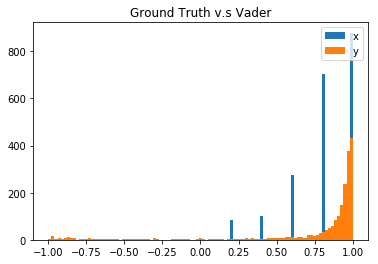

In [36]:
getHistogram('both', 'Ground Truth v.s Vader')

Text(0,0.5,'# of count')

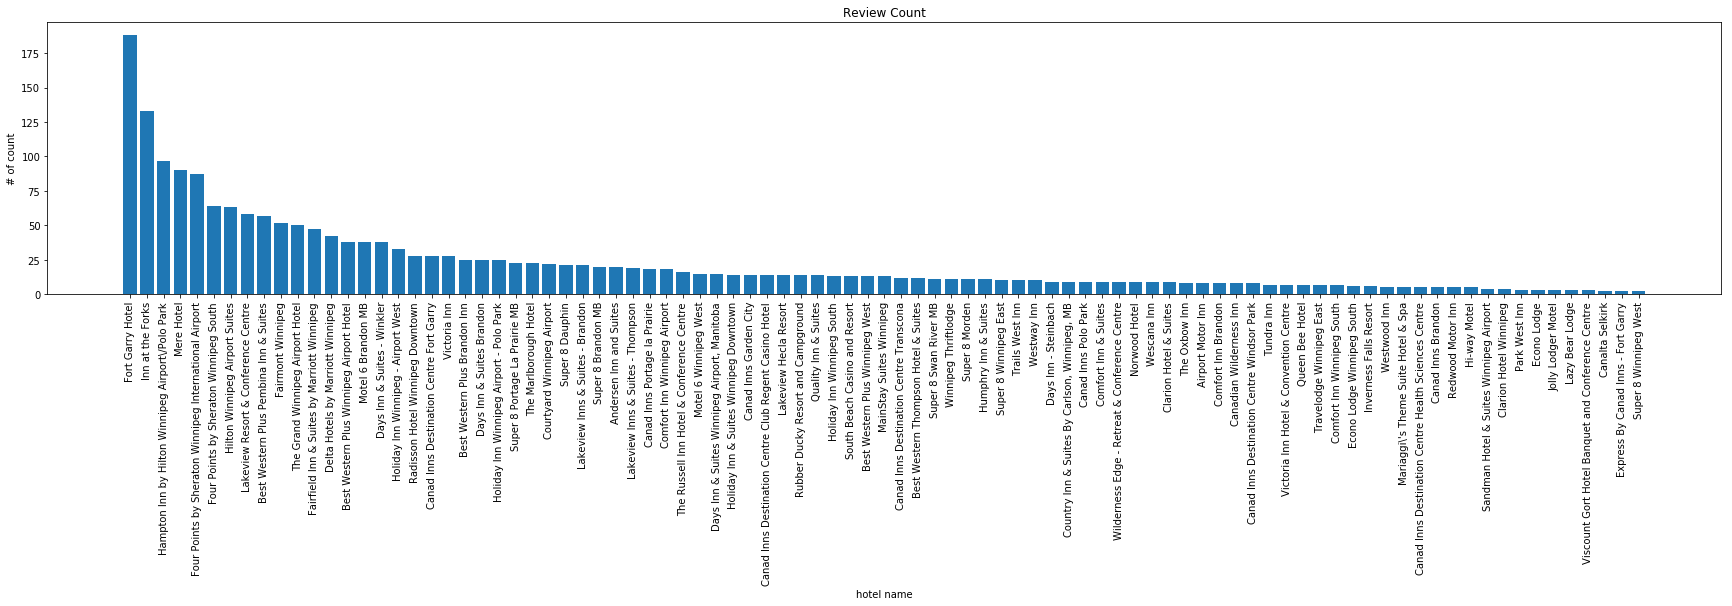

In [37]:
review_number = finaldf.hotelName.value_counts()
plt.figure(figsize = (30,5))
l = range(len(review_number))
x = list(review_number.keys())
y = review_number.values
plt.bar(x, y)
plt.title('Review Count')
plt.xticks(l,x,rotation=90)
plt.xlabel('hotel name')
plt.ylabel('# of count')

Hotels which have many reviews tend to have high rating scores.Basically, higher raiting score corrsponds to more reviews. Customer are more likely to give reviews if the experience is great.

In [38]:
tp5gthotel = hotelRatingDfGt.sort_values('avgRatingScore',ascending=0).head(5)
tp5gthotel['hotelName'].values

array(['Canalta Selkirk', 'Lazy Bear Lodge', 'Inverness Falls Resort',
       'Norwood Hotel', 'Courtyard Winnipeg Airport'], dtype=object)

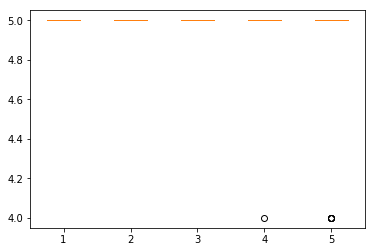

In [39]:
#Plot top 5 side-by-side boxplot for top 5 ground truth rated hotel
tp5gthotel = hotelRatingDfGt.sort_values('avgRatingScore',ascending=0).head(5)
tp5gthotel['hotelName'].values

Canalta_Selkirk = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[0]]['ratingScore']
Lazy_Bear_Lodge = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[1]]['ratingScore']
Inverness_Falls_Resort = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[2]]['ratingScore']
Norwood_Hotel = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[3]]['ratingScore']
Courtyard_Winnipeg_Airport = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[4]]['ratingScore']

data = [Canalta_Selkirk, Lazy_Bear_Lodge, Inverness_Falls_Resort, Norwood_Hotel, Courtyard_Winnipeg_Airport]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)
plt.show()

In [40]:
tp5gthotel = hotelRatingDfVd.sort_values('avgvader',ascending=0).head(5)
tp5gthotel['hotelName'].values

array(['Super 8 Winnipeg West', 'Inverness Falls Resort',
       'Canalta Selkirk', 'Victoria Inn Hotel & Convention Centre',
       'Lazy Bear Lodge'], dtype=object)

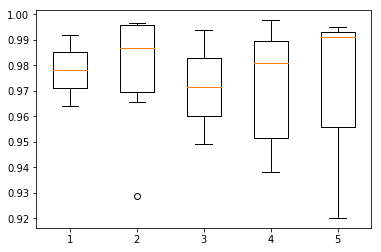

In [41]:
tp5hotel = hotelRatingDfVd.sort_values('avgvader',ascending=0).head(5)
tp5hotel['hotelName'].values

Super = finaldf.loc[finaldf['hotelName'] == tp5hotel['hotelName'].values[0]]['vader']
Inverness = finaldf.loc[finaldf['hotelName'] == tp5hotel['hotelName'].values[1]]['vader']
Canalta = finaldf.loc[finaldf['hotelName'] == tp5hotel['hotelName'].values[2]]['vader']
Victoria = finaldf.loc[finaldf['hotelName'] == tp5hotel['hotelName'].values[3]]['vader']
Lazy = finaldf.loc[finaldf['hotelName'] == tp5hotel['hotelName'].values[4]]['vader']

data_vader = [Super, Inverness, Canalta, Victoria, Lazy]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data_vader)
plt.show()

In [42]:
gtmean=[i.mean() for i in data]
gtvar=[i.var() for i in data]   
vadermean=[i.mean() for i in data_vader]
vadervar=[i.var() for i in data_vader]  
print(gtmean)
print(gtvar)
print(vadermean)
print(vadervar)

[5.0, 5.0, 5.0, 4.888888888888889, 4.7727272727272725]
[0.0, 0.0, 0.0, 0.11111111111111112, 0.183982683982684]
[0.97805, 0.9769000000000001, 0.9715, 0.9713285714285715, 0.9688666666666667]
[0.0003948050000000004, 0.0007020720000000008, 0.0010035199999999978, 0.0005851090476190484, 0.0017874433333333302]


Boxplot is more informative. The table only shows the means and variance. The boxplot shows quartiles and it's visual.

f:\3.5.2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
f:\3.5.2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Text(0.5,0,'Vader Score')

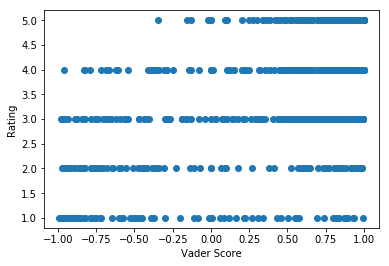

In [43]:
y = finaldf['ratingScore'].as_matrix()
x = finaldf['vader'].as_matrix()
plt.plot(x, y,"o")
plt.ylabel('Rating')
plt.xlabel('Vader Score')

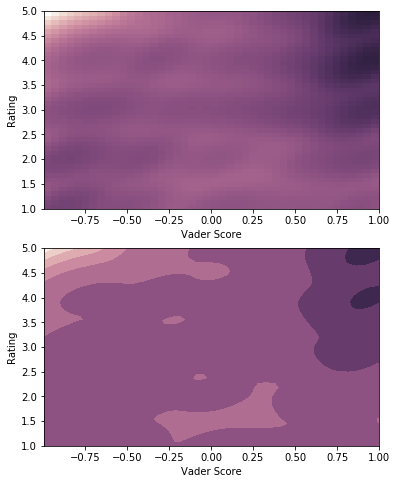

In [44]:
from scipy.stats.kde import gaussian_kde
def heatmap(x,y,x_label='Vader Score', y_label='Rating'):
    k = gaussian_kde(np.vstack([x, y]))
    xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))

    cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    fig = plt.figure(figsize=(6,8))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)

    ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
    ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

    ax1.set_xlim(x.min(), x.max())
    ax1.set_ylim(y.min(), y.max())
    ax2.set_xlim(x.min(), x.max())
    ax2.set_ylim(y.min(), y.max())


    ax1.set_xlabel(x_label)
    ax1.set_ylabel(y_label)

    ax2.set_xlabel(x_label)
    ax2.set_ylabel(y_label)
    
heatmap(x,y)

In [45]:
len_review = np.array([len(i.split()) for i in finaldf["reviewCol"]])
len_review

array([130, 141, 122, ..., 149,  44,  38])

Text(0.5,0,'len_review')

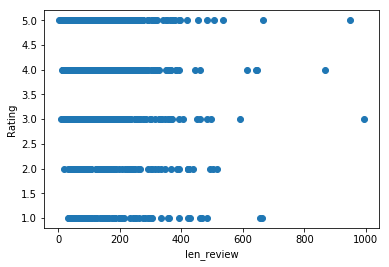

In [46]:
plt.plot(len_review, y,"o")
plt.ylabel('Rating')
plt.xlabel('len_review')

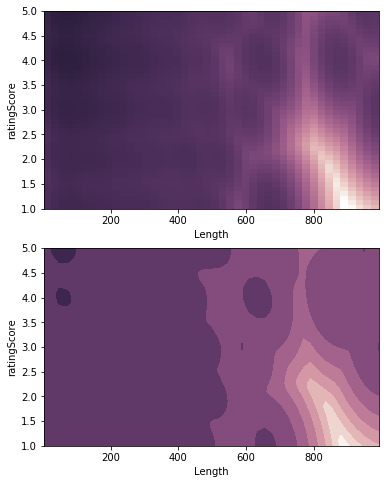

In [47]:
heatmap(len_review,y, x_label='Length',y_label='ratingScore')

Text(0.5,0,'len_review')

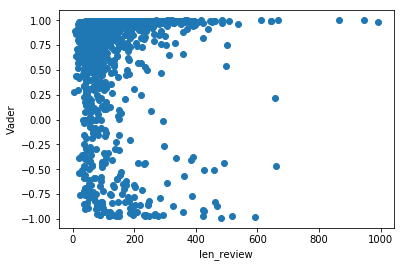

In [48]:
plt.plot(len_review, x,"o")
plt.ylabel('Vader')
plt.xlabel('len_review')

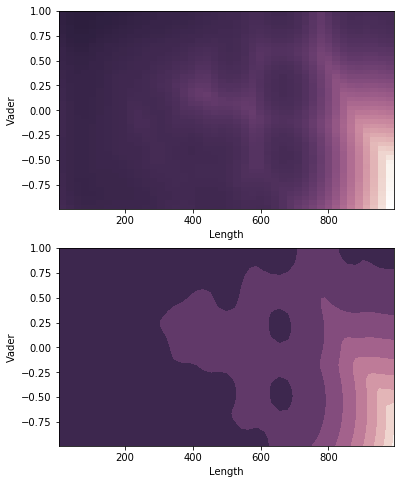

In [49]:
heatmap(len_review,x, x_label='Length',y_label='Vader')

Text(0.5,0,'len_review')

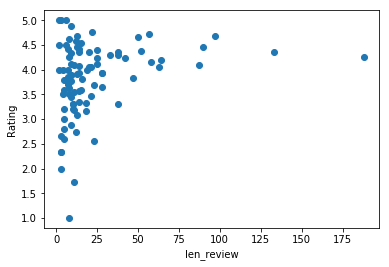

In [50]:
new_rating = []
new_vader = []
for i in list(review_number.keys()):
    new_rating.append(hotelRatingDfGt.loc[hotelRatingDfGt['hotelName']==i]["avgRatingScore"].values[0])
    new_vader.append(hotelRatingDfVd.loc[hotelRatingDfVd['hotelName']==i]["avgvader"].values[0])
plt.plot(review_number.values, new_rating,"o")
plt.ylabel('Rating')
plt.xlabel('len_review')

Text(0.5,0,'len_review')

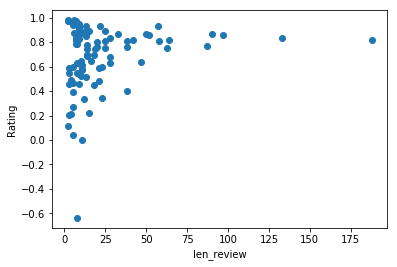

In [51]:
plt.plot(review_number.values, new_vader,"o")
plt.ylabel('Rating')
plt.xlabel('len_review')